Tổng số ảnh trong folder 'exercise': 3

Chọn phương pháp biến đổi ảnh:
F - Fast Fourier
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Thoát



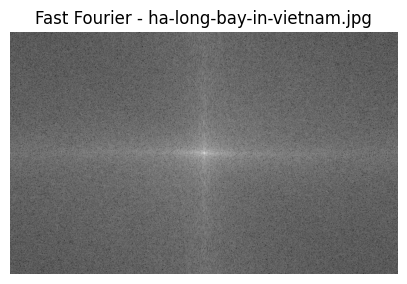

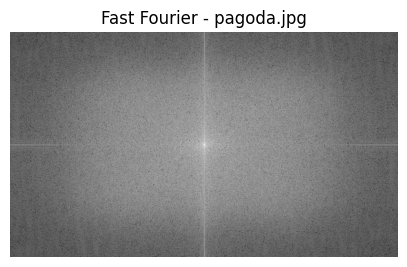

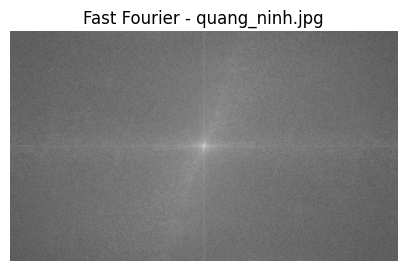


Chọn phương pháp biến đổi ảnh:
F - Fast Fourier
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Thoát



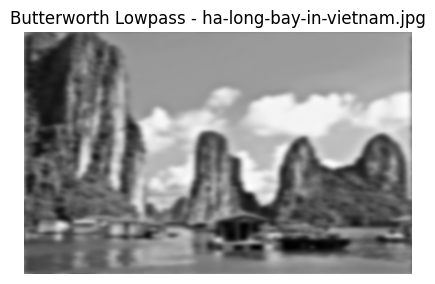

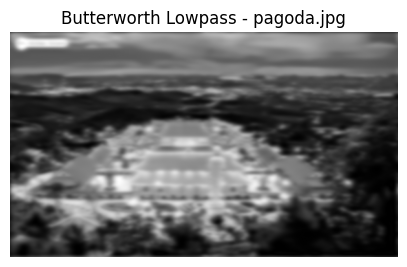

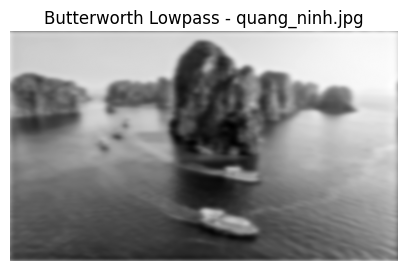


Chọn phương pháp biến đổi ảnh:
F - Fast Fourier
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Thoát

Lựa chọn không hợp lệ. Vui lòng thử lại.

Chọn phương pháp biến đổi ảnh:
F - Fast Fourier
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Thoát



C:\Users\Admin\AppData\Local\Temp\ipykernel_59684\3120701420.py:46: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (D0/D)**(2*n))


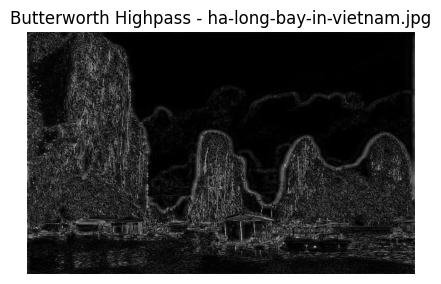

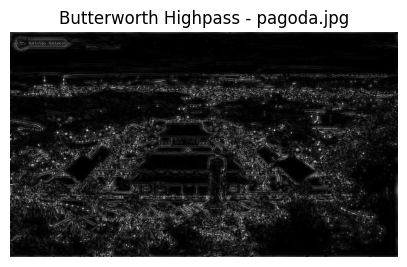

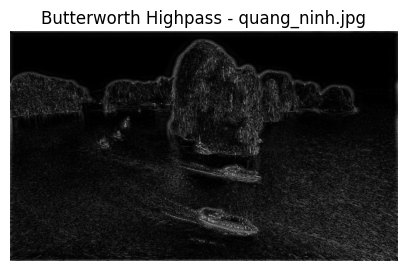


Chọn phương pháp biến đổi ảnh:
F - Fast Fourier
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Thoát



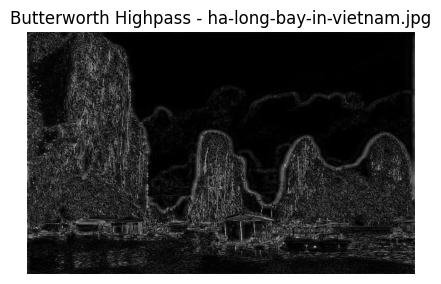

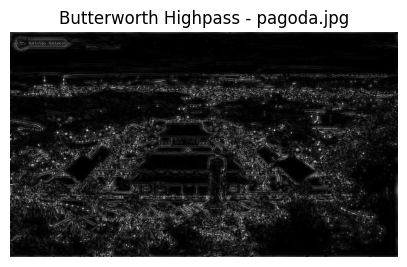

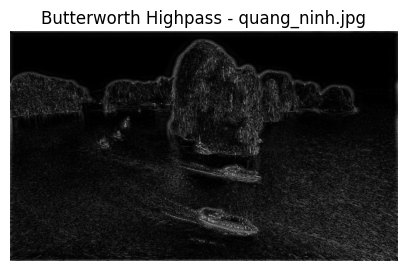


Chọn phương pháp biến đổi ảnh:
F - Fast Fourier
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Thoát

Kết thúc chương trình.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def get_image_files(folder):
    exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')
    return [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(exts)]

def show_img(title, img):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

def fast_fourier(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(255 * magnitude_spectrum / np.max(magnitude_spectrum))

def butterworth_lowpass(img, D0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows//2, cols//2
    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt((U-crow)**2 + (V-ccol)**2)
    H = 1 / (1 + (D/D0)**(2*n))
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)
    G = H * Fshift
    img_back = np.fft.ifft2(np.fft.ifftshift(G))
    img_back = np.abs(img_back)
    img_back = np.uint8(255 * img_back / np.max(img_back))
    return img_back

def butterworth_highpass(img, D0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows//2, cols//2
    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt((U-crow)**2 + (V-ccol)**2)
    H = 1 / (1 + (D0/D)**(2*n))
    H[D==0] = 0  # tránh chia cho 0
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)
    G = H * Fshift
    img_back = np.fft.ifft2(np.fft.ifftshift(G))
    img_back = np.abs(img_back)
    img_back = np.uint8(255 * img_back / np.max(img_back))
    return img_back

folder = 'exercise'
image_files = get_image_files(folder)
print(f"Tổng số ảnh trong folder '{folder}': {len(image_files)}")

menu = """
Chọn phương pháp biến đổi ảnh:
F - Fast Fourier
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Thoát
"""

while True:
    print(menu)
    key = input("Nhập lựa chọn của bạn: ").upper()
    if key in ['F', 'L', 'H']:
        for img_path in image_files:
            img = cv2.imread(img_path, 0)
            if img is None:
                print(f"Không thể đọc ảnh: {img_path}")
                continue
            if key == 'F':
                show_img(f"Fast Fourier - {os.path.basename(img_path)}", fast_fourier(img))
            elif key == 'L':
                show_img(f"Butterworth Lowpass - {os.path.basename(img_path)}", butterworth_lowpass(img))
            elif key == 'H':
                show_img(f"Butterworth Highpass - {os.path.basename(img_path)}", butterworth_highpass(img))
    elif key == 'Q':
        print("Kết thúc chương trình.")
        break
    else:
        print("Lựa chọn không hợp lệ. Vui lòng thử lại.")